In [1]:
# Import the random module.
import random
import numpy as np
import timeit
import pandas as pd
import matplotlib.pyplot as plt

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import requests
import requests

# Importing API key
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime
import time

# Importing Stats library
from scipy.stats import linregress

# Import gmaps
import gmaps

# Import the API key.
from config import g_key

In [2]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [3]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

axim gh
marmashen am
hobart au
hermanus za
rawson ar
port alfred za
itaguai br
rikitea pf
thinadhoo mv
clyde river ca
rungata ki
sentyabrskiy ru
bacabal br
vaini to
fallon us
hermanus za
port hardy ca
gornozavodsk ru
lebu cl
puerto ayora ec
atuona pf
talnakh ru
juquia br
faanui pf
kuche cn
tuatapere nz
belushya guba ru
busselton au
zhigalovo ru
mataura pf
rikitea pf
nyurba ru
taolanaro mg
hermanus za
hobart au
upernavik gl
saint-augustin ca
inta ru
ushuaia ar
jamestown sh
busselton au
duminichi ru
baghdad iq
katsuura jp
rikitea pf
dunedin nz
tumannyy ru
kapaa us
grand gaube mu
upernavik gl
arraial do cabo br
ende id
saleaula ws
port alfred za
tiksi ru
nelson ca
kodiak us
port hedland au
taolanaro mg
hobart au
punta arenas cl
nantucket us
ximei cn
barrow us
ilulissat gl
oranjestad aw
port hardy ca
sinop tr
ushuaia ar
sentyabrskiy ru
jian cn
lolua tv
busselton au
port elizabeth za
mahebourg mu
butaritari ki
ugoofaaru mv
ushuaia ar
souillac mu
taolanaro mg
kaitangata nz
punta arenas cl
am

cockburn town tc
nome us
san patricio mx
ikongo mg
busselton au
rikitea pf
mataura pf
punta arenas cl
pocatello us
hofn is
tungkang tw
caucaia br
carnarvon au
atuona pf
namatanai pg
amderma ru
methoni gr
mataura pf
albany au
mataura pf
souillac mu
kapaa us
albany au
hobart au
thohoyandou za
victoria sc
alofi nu
arraial do cabo br
atasu kz
bluff nz
mahebourg mu
rikitea pf
goderich sl
geraldton au
mar del plata ar
mataura pf
rikitea pf
hobart au
ushuaia ar
xichang cn
wahran dz
antofagasta cl
castro cl
yellowknife ca
urucara br
klaksvik fo
padang id
ende id
bairiki ki
nago jp
puerto ayora ec
port alfred za
galveston us
mar del plata ar
lashio mm
yei sd
thompson ca
bluff nz
marawi sd
souillac mu
myatlevo ru
constitucion mx
yura pe
provideniya ru
taolanaro mg
rocha uy
placido de castro br
mataura pf
torbay ca
airai pw
ponta do sol cv
busselton au
chokurdakh ru
butaritari ki
ishikawa jp
yar-sale ru
vila franca do campo pt
rafai cf
bandrele yt
plouzane fr
mataura pf
port alfred za
nouadhibou 

nemuro jp
bollnas se
busselton au
busselton au
kanker in
avarua ck
chapleau ca
nizhneyansk ru
port alfred za
skagastrond is
pradera co
barrow us
vaini to
krasnoselkup ru
arraial do cabo br
rikitea pf
pangnirtung ca
rikitea pf
lasa cn
qaqortoq gl
busselton au
tsihombe mg
butajira et
aksha ru
kelso us
sarangani ph
busselton au
ponta do sol cv
hithadhoo mv
busselton au
saint george bm
butaritari ki
east london za
ribeira grande pt
barentsburg sj
mabaruma gy
general cepeda mx
georgetown sh
bredasdorp za
talaya ru
qaanaaq gl
berlevag no
rikitea pf
hithadhoo mv
juxian cn
iqaluit ca
atuona pf
dikson ru
olafsvik is
nikolskoye ru
jijiga et
kutum sd
bredasdorp za
vostok ru
tumannyy ru
natal br
pisco pe
barrow us
gat ly
beringovskiy ru
hilo us
rocha uy
mataura pf
imbituba br
sentyabrskiy ru
illoqqortoormiut gl
taolanaro mg
tura ru
solnechnyy ru
saskylakh ru
hasaki jp
shelburne ca
bluff nz
sao filipe cv
alofi nu
coahuayana mx
launceston au


In [7]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

615

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"

In [10]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [11]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [12]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [13]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":300,"main":"Drizzle","description":"light intensity drizzle","icon":"09n"},{"id":701,"main":"Mist","description":"mist","icon":"50n"}],"base":"stations","main":{"temp":42.94,"feels_like":34.72,"temp_min":40.28,"temp_max":45.23,"pressure":1012,"humidity":95},"visibility":1207,"wind":{"speed":18.41,"deg":40},"clouds":{"all":100},"dt":1648167784,"sys":{"type":2,"id":2013408,"country":"US","sunrise":1648118433,"sunset":1648162819},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [14]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 300,
   'main': 'Drizzle',
   'description': 'light intensity drizzle',
   'icon': '09n'},
  {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}],
 'base': 'stations',
 'main': {'temp': 42.94,
  'feels_like': 34.72,
  'temp_min': 40.28,
  'temp_max': 45.23,
  'pressure': 1012,
  'humidity': 95},
 'visibility': 1207,
 'wind': {'speed': 18.41, 'deg': 40},
 'clouds': {'all': 100},
 'dt': 1648167784,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1648118433,
  'sunset': 1648162819},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [15]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [16]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City weather not found.


In [17]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 300,
   'main': 'Drizzle',
   'description': 'light intensity drizzle',
   'icon': '09n'},
  {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}],
 'base': 'stations',
 'main': {'temp': 42.94,
  'feels_like': 34.72,
  'temp_min': 40.28,
  'temp_max': 45.23,
  'pressure': 1012,
  'humidity': 95},
 'visibility': 1207,
 'wind': {'speed': 18.41, 'deg': 40},
 'clouds': {'all': 100},
 'dt': 1648167784,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1648118433,
  'sunset': 1648162819},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [18]:
# Get the JSON data.
boston_data = city_weather.json()

In [19]:
boston_data["sys"]

{'type': 2,
 'id': 2013408,
 'country': 'US',
 'sunrise': 1648118433,
 'sunset': 1648162819}

In [20]:
boston_data["sys"]["country"]

'US'

In [21]:
boston_data["dt"]

1648167784

In [22]:
boston_data["coord"]["lat"]

42.3584

In [23]:
boston_data["main"]["temp_max"]

45.23

In [24]:
# Displaying information from JSON
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 45.23 95 100 18.41


In [25]:
# Get the date from the JSON file.
date = boston_data["dt"]

# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2022, 3, 25, 0, 23, 4)

In [26]:
# Display time and date
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-03-25 00:23:04'

In [27]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
    
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass


# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------") 

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | axim
Processing Record 2 of Set 1 | marmashen
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | rawson
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | itaguai
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | thinadhoo
Processing Record 10 of Set 1 | clyde river
Processing Record 11 of Set 1 | rungata
City not found. Skipping...
Processing Record 12 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 13 of Set 1 | bacabal
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | fallon
Processing Record 16 of Set 1 | port hardy
Processing Record 17 of Set 1 | gornozavodsk
Processing Record 18 of Set 1 | lebu
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | atuona
Processing Record 21 of Set 1 | talnakh
Processing Record 22 of Set 1 | ju

Processing Record 37 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 38 of Set 4 | utete
Processing Record 39 of Set 4 | paamiut
Processing Record 40 of Set 4 | havre de grace
Processing Record 41 of Set 4 | daru
Processing Record 42 of Set 4 | noumea
Processing Record 43 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 44 of Set 4 | kavaratti
Processing Record 45 of Set 4 | iqaluit
Processing Record 46 of Set 4 | grindavik
Processing Record 47 of Set 4 | narsaq
Processing Record 48 of Set 4 | saint-francois
Processing Record 49 of Set 4 | labutta
City not found. Skipping...
Processing Record 50 of Set 4 | sitka
Processing Record 1 of Set 5 | escanaba
Processing Record 2 of Set 5 | sogdiondon
City not found. Skipping...
Processing Record 3 of Set 5 | conakry
Processing Record 4 of Set 5 | hella
Processing Record 5 of Set 5 | rapla
Processing Record 6 of Set 5 | bowen
Processing Record 7 of Set 5 | pevek
Processing Record 8 of Set 5 | 

Processing Record 29 of Set 8 | padang
Processing Record 30 of Set 8 | bairiki
Processing Record 31 of Set 8 | nago
Processing Record 32 of Set 8 | galveston
Processing Record 33 of Set 8 | lashio
Processing Record 34 of Set 8 | yei
Processing Record 35 of Set 8 | marawi
Processing Record 36 of Set 8 | myatlevo
Processing Record 37 of Set 8 | constitucion
Processing Record 38 of Set 8 | yura
Processing Record 39 of Set 8 | placido de castro
Processing Record 40 of Set 8 | torbay
Processing Record 41 of Set 8 | ishikawa
Processing Record 42 of Set 8 | yar-sale
Processing Record 43 of Set 8 | vila franca do campo
Processing Record 44 of Set 8 | rafai
Processing Record 45 of Set 8 | bandrele
Processing Record 46 of Set 8 | plouzane
Processing Record 47 of Set 8 | nouadhibou
Processing Record 48 of Set 8 | tres arroyos
Processing Record 49 of Set 8 | bengkulu
Processing Record 50 of Set 8 | washington
Processing Record 1 of Set 9 | kerman
Processing Record 2 of Set 9 | ekhabi
Processing Re

Processing Record 18 of Set 12 | micomeseng
Processing Record 19 of Set 12 | toccoa
Processing Record 20 of Set 12 | miramar
Processing Record 21 of Set 12 | tambacounda
Processing Record 22 of Set 12 | cayenne
Processing Record 23 of Set 12 | pahrump
Processing Record 24 of Set 12 | pakxe
Processing Record 25 of Set 12 | murupara
Processing Record 26 of Set 12 | saint anthony
Processing Record 27 of Set 12 | agropoli
Processing Record 28 of Set 12 | warqla
City not found. Skipping...
Processing Record 29 of Set 12 | show low
Processing Record 30 of Set 12 | north bend
Processing Record 31 of Set 12 | the valley
Processing Record 32 of Set 12 | katangli
Processing Record 33 of Set 12 | hohhot
Processing Record 34 of Set 12 | villa oliva
City not found. Skipping...
Processing Record 35 of Set 12 | pandan
Processing Record 36 of Set 12 | kamina
Processing Record 37 of Set 12 | leningradskiy
Processing Record 38 of Set 12 | isangel
Processing Record 39 of Set 12 | bollnas
Processing Recor

In [28]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Axim,4.8699,-2.2405,80.35,85,44,4.61,GH,2022-03-25 00:25:31
1,Marmashen,40.8349,43.7779,16.48,79,20,1.14,AM,2022-03-25 00:25:32
2,Hobart,-42.8794,147.3294,71.06,57,20,9.22,AU,2022-03-25 00:25:32
3,Hermanus,-34.4187,19.2345,59.81,80,98,14.54,ZA,2022-03-25 00:25:06
4,Rawson,-43.3002,-65.1023,58.23,65,0,12.35,AR,2022-03-25 00:25:33
5,Port Alfred,-33.5906,26.8910,67.50,81,58,14.85,ZA,2022-03-25 00:25:33
6,Itaguai,-22.8522,-43.7753,80.67,69,0,4.61,BR,2022-03-25 00:25:34
7,Rikitea,-23.1203,-134.9692,79.72,69,100,13.35,PF,2022-03-25 00:25:34
8,Thinadhoo,0.5333,72.9333,83.53,66,1,18.32,MV,2022-03-25 00:21:34
9,Clyde River,70.4692,-68.5914,-5.57,84,100,25.32,CA,2022-03-25 00:19:50


In [29]:
# Reorder the column order
new_column_order = ["City", "Country", "Date", "Lat","Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Axim,GH,2022-03-25 00:25:31,4.8699,-2.2405,80.35,85,44,4.61
1,Marmashen,AM,2022-03-25 00:25:32,40.8349,43.7779,16.48,79,20,1.14
2,Hobart,AU,2022-03-25 00:25:32,-42.8794,147.3294,71.06,57,20,9.22
3,Hermanus,ZA,2022-03-25 00:25:06,-34.4187,19.2345,59.81,80,98,14.54
4,Rawson,AR,2022-03-25 00:25:33,-43.3002,-65.1023,58.23,65,0,12.35
...,...,...,...,...,...,...,...,...,...
561,Tura,IN,2022-03-25 00:20:37,25.5198,90.2201,68.07,95,15,8.55
562,Solnechnyy,RU,2022-03-25 00:28:47,50.7214,136.6319,27.57,90,89,3.36
563,Shelburne,CA,2022-03-25 00:28:47,44.0787,-80.2041,43.56,95,100,13.62
564,Coahuayana,MX,2022-03-25 00:20:35,18.7333,-103.6833,80.40,44,0,5.01


In [30]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [31]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [32]:
# Get today's date in seconds.
today = time.time()
today

1648168128.9512715

In [33]:
# Get today's date in seconds.
today = time.strftime("%x")
today

'03/24/22'

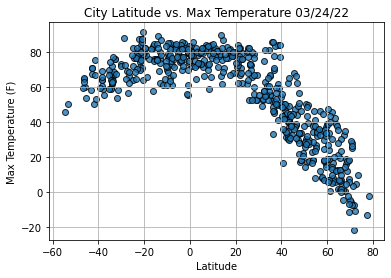

In [34]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

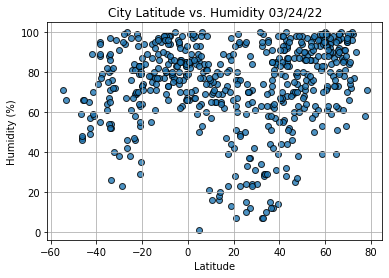

In [35]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

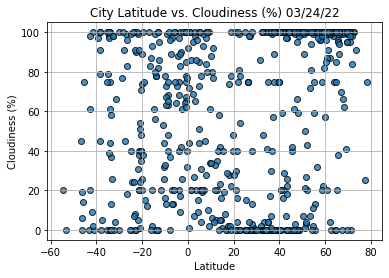

In [36]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

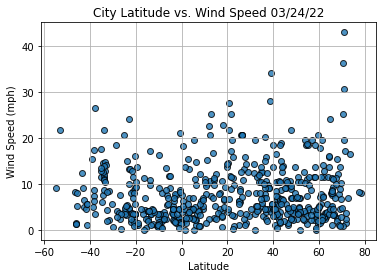

In [37]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [38]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [39]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [40]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

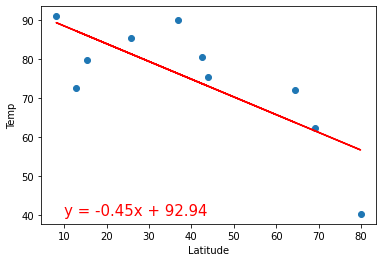

In [41]:
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")

# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [42]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [43]:
#Displaying output
index13 = city_data_df.loc[13]
index13

City                   Port Hardy
Country                        CA
Date          2022-03-25 00:25:36
Lat                       50.6996
Lng                     -127.4199
Max Temp                    50.18
Humidity                       62
Cloudiness                    100
Wind Speed                   11.5
Name: 13, dtype: object

In [44]:
# Displaying values of a row
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3      False
4      False
       ...  
561     True
562     True
563     True
564     True
565    False
Name: Lat, Length: 566, dtype: bool

In [45]:
# Displaying values of a row
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Axim,GH,2022-03-25 00:25:31,4.8699,-2.2405,80.35,85,44,4.61
1,Marmashen,AM,2022-03-25 00:25:32,40.8349,43.7779,16.48,79,20,1.14
8,Thinadhoo,MV,2022-03-25 00:21:34,0.5333,72.9333,83.53,66,1,18.32
9,Clyde River,CA,2022-03-25 00:19:50,70.4692,-68.5914,-5.57,84,100,25.32
12,Fallon,US,2022-03-25 00:19:53,39.4735,-118.7774,77.45,14,75,5.75
...,...,...,...,...,...,...,...,...,...
560,Gat,IL,2022-03-25 00:19:58,31.6100,34.7642,49.41,100,86,14.45
561,Tura,IN,2022-03-25 00:20:37,25.5198,90.2201,68.07,95,15,8.55
562,Solnechnyy,RU,2022-03-25 00:28:47,50.7214,136.6319,27.57,90,89,3.36
563,Shelburne,CA,2022-03-25 00:28:47,44.0787,-80.2041,43.56,95,100,13.62


In [46]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

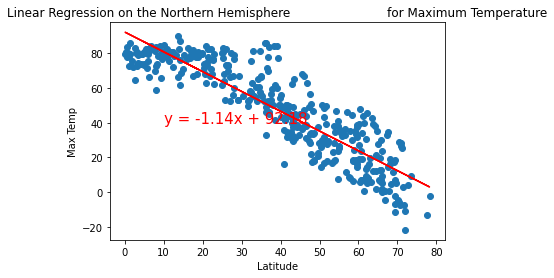

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

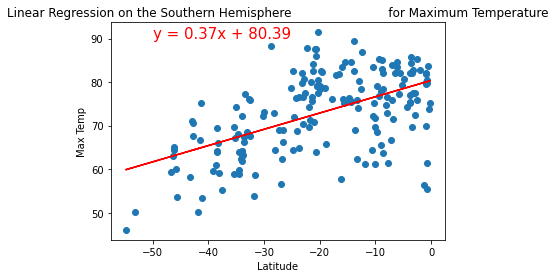

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

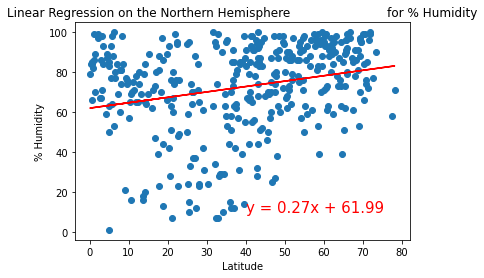

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

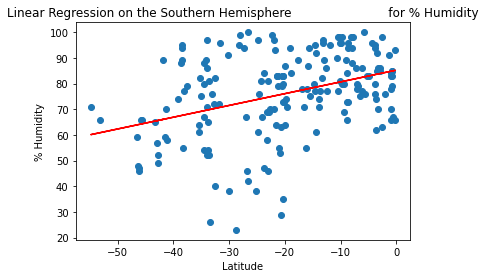

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

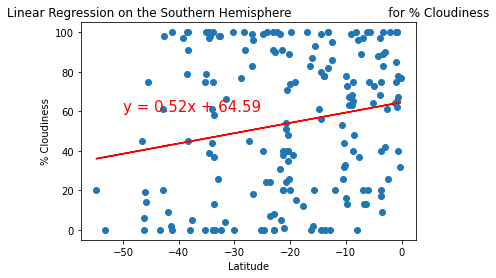

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

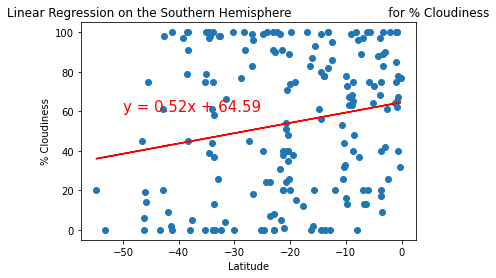

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

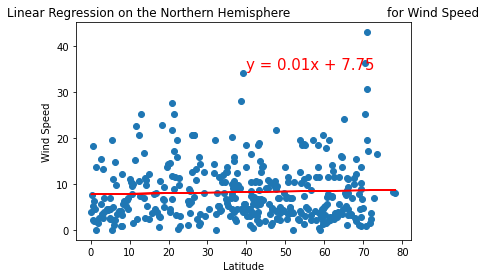

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

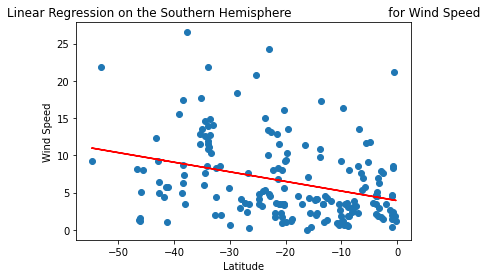

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [55]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")

city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Axim,GH,2022-03-25 00:25:31,4.8699,-2.2405,80.35,85,44,4.61
1,1,Marmashen,AM,2022-03-25 00:25:32,40.8349,43.7779,16.48,79,20,1.14
2,2,Hobart,AU,2022-03-25 00:25:32,-42.8794,147.3294,71.06,57,20,9.22
3,3,Hermanus,ZA,2022-03-25 00:25:06,-34.4187,19.2345,59.81,80,98,14.54
4,4,Rawson,AR,2022-03-25 00:25:33,-43.3002,-65.1023,58.23,65,0,12.35


In [56]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)

In [57]:
# 1. Assign the locations to an array of latitude and longitude pairs.
locations = city_data_df[["Lat", "Lng"]]

# 2. Assign the weights variable to some values.
max_temp = city_data_df["Max Temp"]

# 3. Assign the figure variable to the gmaps.figure() attribute.
fig = gmaps.figure()
temperatures= abs(max_temp)

# 4. Assign the heatmap_layer variable to the heatmap_layer attribute and add in the locations.
heatmap_layer = gmaps.heatmap_layer(locations, weights=temperatures)

# 5. Add the heatmap layer.
fig.add_layer(heatmap_layer)

# 6. Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [58]:
# 1. Assign the locations to an array of latitude and longitude pairs.
locations = city_data_df[["Lat", "Lng"]]

# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
temps = []
for temp in max_temp:
    temps.append(max(temp, 0))

# 3. Assign the figure variable to the gmaps.figure() attribute.
fig = gmaps.figure()
temperatures= abs(max_temp)

# 4. Assign the heatmap_layer variable to the heatmap_layer attribute and add in the locations.
heatmap_layer = gmaps.heatmap_layer(locations, weights=temperatures)

# 5. Add the heatmap layer.
fig.add_layer(heatmap_layer)

# 6. Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [59]:
# Another Possible solution to display

# 2. Prompt the user to enter minimum and maximum temperature criteria 
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
temps = []

for temp in max_temp:
    temps.append(max(temp, 0))
    
# Assign the figure variable.
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)

# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp])

# Add the heatmap layer.
fig.add_layer(heat_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [60]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [61]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 75
What is the maximum temperature you would like for your trip? 90


In [62]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Axim,GH,2022-03-25 00:25:31,4.8699,-2.2405,80.35,85,44,4.61
6,6,Itaguai,BR,2022-03-25 00:25:34,-22.8522,-43.7753,80.67,69,0,4.61
7,7,Rikitea,PF,2022-03-25 00:25:34,-23.1203,-134.9692,79.72,69,100,13.35
8,8,Thinadhoo,MV,2022-03-25 00:21:34,0.5333,72.9333,83.53,66,1,18.32
11,11,Vaini,TO,2022-03-25 00:25:35,-21.2000,-175.2000,82.56,83,40,11.50
12,12,Fallon,US,2022-03-25 00:19:53,39.4735,-118.7774,77.45,14,75,5.75
16,16,Puerto Ayora,EC,2022-03-25 00:25:37,-0.7393,-90.3518,79.77,79,67,8.63
17,17,Atuona,PF,2022-03-25 00:25:37,-9.8000,-139.0333,79.21,80,73,16.37
19,19,Juquia,BR,2022-03-25 00:25:38,-24.3208,-47.6347,76.44,81,24,3.27
20,20,Faanui,PF,2022-03-25 00:16:13,-16.4833,-151.7500,81.86,71,83,11.34


In [63]:
# Display the cities DF

preferred_cities_df.count()

City_ID       185
City          185
Country       185
Date          185
Lat           185
Lng           185
Max Temp      185
Humidity      185
Cloudiness    185
Wind Speed    185
dtype: int64

In [64]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
0,Axim,GH,80.35,4.8699,-2.2405,
6,Itaguai,BR,80.67,-22.8522,-43.7753,
7,Rikitea,PF,79.72,-23.1203,-134.9692,
8,Thinadhoo,MV,83.53,0.5333,72.9333,
11,Vaini,TO,82.56,-21.2000,-175.2000,
12,Fallon,US,77.45,39.4735,-118.7774,
16,Puerto Ayora,EC,79.77,-0.7393,-90.3518,
17,Atuona,PF,79.21,-9.8000,-139.0333,
19,Juquia,BR,76.44,-24.3208,-47.6347,
20,Faanui,PF,81.86,-16.4833,-151.7500,


In [65]:
# Set the parameters to search for a hotel in Paris.
params = {
    "radius": 5000,
    "types": "lodging",
    "key": g_key,
    "location": "48.8566, 2.3522"}
# Use base URL to search for hotels in Paris.
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
# Make request and get the JSON data from the search.
hotels = requests.get(base_url, params=params).json()

hotels

{'html_attributions': [],
 'next_page_token': 'Aap_uEDG5zikZCY1NXWDFsFAwLxUyL8KZFao9OC1qDEPORVp71a_8IvL5BnR1Y5ZAZP0P_1TS5_XosUSDCSc_pkAhtkIXpPTYjk0cODGxb7OXReVw3J4Ck5O19U-INjDZADdYz16vJ8nJyOhoylj48vVmzGe6QlR7OAKG3jQ-ZSRq-j0mxsGqGg8QEIVvNLnfGkTRFrs4wYCURE0UAPTQuuzaEpIXnMY1NnIUVQcW8Ch2LF0YGLYquFWOvc3mD5ikxz2-O3shBr7gkEECBDcuOANFEBoEGtS0hu9RKdwTXhtMVJNlvniPye3PVqTx-lziloQsJ0IcGJooWKi7oLeLsSftKi99HxKVcmoJmN3IDNp5To7Sk_poKW5q0UEfpBj_gT46hSEKX0-oLVaKvoBzi0EkJgy7Dy-SdUVR0FwaXCh7Jx_xpY3_xkh5VIU',
 'results': [{'business_status': 'OPERATIONAL',
   'geometry': {'location': {'lat': 48.8581126, 'lng': 2.3529277},
    'viewport': {'northeast': {'lat': 48.8594360302915,
      'lng': 2.354355480291502},
     'southwest': {'lat': 48.8567380697085, 'lng': 2.351657519708498}}},
   'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/lodging-71.png',
   'icon_background_color': '#909CE1',
   'icon_mask_base_uri': 'https://maps.gstatic.com/mapfiles/place_api/icons/v2/hotel_pinlet',
   'nam

In [66]:
#Cleaning output

len(hotels["results"])

20

In [76]:
# Iterate through the DataFrame.
for index, row in hotel_df.iterrows():
    # Get the latitude and longitude.
    lat = row["Lat"]
    lng = row["Lng"]

    # Add the latitude and longitude to location key for the params dictionary.
    params = {
        "location": f"{lat},{lng}",
        "radius": 5000,
        "types" : "hotel",
        "key": g_key
    }

    # Use the search term: "lodging" and our latitude and longitude.
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    
    # Make request and get the JSON data from the search.
    hotels = requests.get(base_url, params=params).json()
    
    # Grab the first hotel from the results and store the name.
    #hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
    
    # Grab the first hotel from the results and store the name.
    try:
        hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
    except (IndexError): print("Hotel not found... skipping.")

Hotel not found... skipping.


In [77]:
# Displaying Hotel Data frame
hotel_df.head()

,City,Country,Max Temp,Lat,Lng,Hotel Name
0,Axim,GH,80.35,4.8699,-2.2405,Axim
6,Itaguai,BR,80.67,-22.8522,-43.7753,Rio de Janeiro
7,Rikitea,PF,79.72,-23.1203,-134.9692,Rikitea
8,Thinadhoo,MV,83.53,0.5333,72.9333,
11,Vaini,TO,82.56,-21.2000,-175.2000,Nukuhetulu


In [68]:
# Add a heatmap of temperature for the vacation spots.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp, dissipating=False,
             max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [69]:
# Add a heatmap of temperature for the vacation spots and marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,
             dissipating=False, max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [73]:
# The text inside the multiline string is HTML code. 
# HTML code is defined by the opening and closing the angular brackets (e.g., <tag> and <tag/>). 

# Using the template add the hotel marks to the heatmap
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Max Temp</dt><dd>{Max Temp} °F</dd>
</dl>
"""

# Store the DataFrame Row.
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]

In [74]:
# Add a heatmap of temperature for the vacation spots and a pop-up marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,dissipating=False,
             max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))